### Coding Exercise 2: Handling Missing Data in a Dataset for Machine Learning

#### 1. Import the necessary Python libraries for data preprocessing, including the `SimpleImputer` class from the scikit-learn library.

In [12]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

AÇIKLAMA: 

Pandas kütüphanesini içe aktarır ve 'pd' kısaltmasıyla kullanılmasını sağlar.
Pandas, veri manipülasyonu ve analizi için çok güçlü bir kütüphanedir.
CSV dosyalarını okuma, veri çerçeveleri (DataFrame) oluşturma ve veri üzerinde çeşitli işlemler yapma gibi işlevler sunar.

#### import numpy as np:
    - NumPy kütüphanesini içe aktarır ve 'np' kısaltmasıyla kullanılmasını sağlar.
    - NumPy, bilimsel hesaplamalar için temel bir kütüphanedir.
    - Çok boyutlu diziler ve matrisler üzerinde hızlı işlemler yapma olanağı sağlar.

#### from sklearn.impute import SimpleImputer:
    - Scikit-learn kütüphanesinden SimpleImputer sınıfını içe aktarır.
    - SimpleImputer, eksik verileri doldurmak için kullanılan bir araçtır.
    - Bu sınıf, eksik değerleri ortalama, medyan, en sık değer gibi çeşitli stratejilerle doldurabilir.
    
Bu kütüphaneler, veri ön işleme ve makine öğrenimi görevleri için temel araçları sağlar. Pandas veri yükleme ve işleme için, NumPy sayısal işlemler için, ve SimpleImputer eksik veri işleme için kullanılacak.

In [19]:
dataset = pd.read_csv('diabetes.csv',na_values=['<null>', ''])
dataset = dataset.replace('', np.nan)

In [20]:
dataset.head()

,NoOfPregency,PlasmaGlucoseCon,BloodPressure,SkinFoldThickness,Insuline,BMI,DiabetesPedigree,Age,Class
0,10.0,108.0,66.0,NaN,0.0,32.4,0.272,42.0,tested_positive
1,7.0,107.0,74.0,0.0,0.0,29.6,0.254,31.0,tested_positive
2,0.0,179.0,90.0,27.0,NaN,NaN,0.686,23.0,tested_positive
3,10.0,125.0,70.0,26.0,NaN,31.1,0.205,41.0,tested_positive
4,10.0,NaN,NaN,0.0,0.0,38.0,0.537,34.0,tested_positive


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NoOfPregency       624 non-null    float64
 1   PlasmaGlucoseCon   621 non-null    float64
 2   BloodPressure      612 non-null    float64
 3   SkinFoldThickness  625 non-null    float64
 4   Insuline           618 non-null    float64
 5   BMI                624 non-null    float64
 6   DiabetesPedigree   615 non-null    float64
 7   Age                629 non-null    float64
 8   Class              690 non-null    object 
dtypes: float64(8), object(1)
memory usage: 48.6+ KB


#### dataset = pd.read_csv('pima-indians-diabetes.csv'):

pd.read_csv() fonksiyonu, belirtilen CSV dosyasını okur ve bir pandas DataFrame'ine dönüştürür.
'pima-indians-diabetes.csv' dosyası, Pima Yerlileri Diyabet veri setini içerir.
Oluşturulan DataFrame, dataset değişkenine atanır.
#### dataset.head():

head() metodu, DataFrame'in ilk 5 satırını gösterir (varsayılan olarak).
Bu, veri setinin genel yapısını hızlıca görmenizi sağlar.

#### dataset.info():

info() metodu, DataFrame hakkında özet bilgiler sunar.
Bu bilgiler arasında sütun isimleri, veri tipleri, boş olmayan değer sayıları ve bellek kullanımı yer alır.

Bu kodun çıktısı, veri setinizin yapısı hakkında size önemli bilgiler verecektir:

Kaç satır ve sütun var?
Sütun isimleri neler?
Her sütundaki veri tipi nedir?
Eksik veri var mı?

Bu bilgiler, veri ön işleme adımlarınızı planlamanıza yardımcı olacaktır. Örneğin, hangi sütunlarda eksik veri olduğunu veya hangi sütunların sayısal/kategorik olduğunu görebilirsiniz.
Eğer çıktıyı görmek isterseniz veya veri seti hakkında daha fazla bilgiye ihtiyacınız varsa, lütfen bana bildirin. Bir sonraki adıma geçmeye hazır olduğunuzda da haber verebilirsiniz.

Eksik Veri Özeti:
                   Missing Values  Percentage Missing
BloodPressure                  78           11.304348
DiabetesPedigree               75           10.869565
Insuline                       72           10.434783
PlasmaGlucoseCon               69           10.000000
NoOfPregency                   66            9.565217
BMI                            66            9.565217
SkinFoldThickness              65            9.420290
Age                            61            8.840580


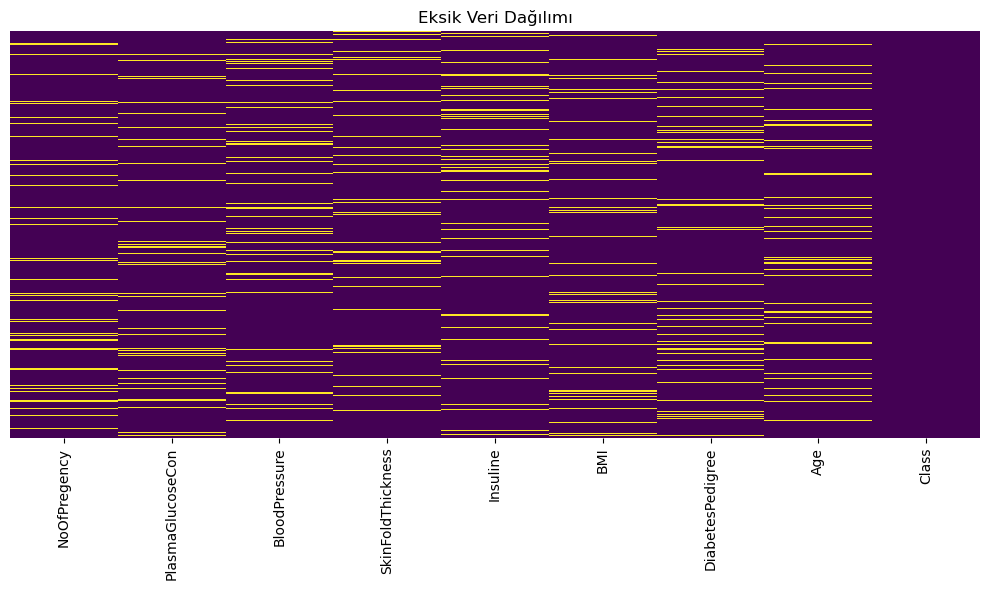


Eksik Verilerin Potansiyel Etkileri:

BloodPressure:
  - Eksik Değer Sayısı: 78
  - Eksik Değer Yüzdesi: 11.30%
  - DÜŞÜK ETKİ: Bu sütundaki eksik veri oranı nispeten düşük. Basit doldurma teknikleri yeterli olabilir.
  - Potansiyel Etki: Bu sütundaki eksik veriler, modelin BloodPressure ile ilgili öğrenme yeteneğini etkileyebilir.

DiabetesPedigree:
  - Eksik Değer Sayısı: 75
  - Eksik Değer Yüzdesi: 10.87%
  - DÜŞÜK ETKİ: Bu sütundaki eksik veri oranı nispeten düşük. Basit doldurma teknikleri yeterli olabilir.
  - Potansiyel Etki: Bu sütundaki eksik veriler, modelin DiabetesPedigree ile ilgili öğrenme yeteneğini etkileyebilir.

Insuline:
  - Eksik Değer Sayısı: 72
  - Eksik Değer Yüzdesi: 10.43%
  - DÜŞÜK ETKİ: Bu sütundaki eksik veri oranı nispeten düşük. Basit doldurma teknikleri yeterli olabilir.
  - Potansiyel Etki: Bu sütundaki eksik veriler, modelin Insuline ile ilgili öğrenme yeteneğini etkileyebilir.

PlasmaGlucoseCon:
  - Eksik Değer Sayısı: 69
  - Eksik Değer Yüzdesi: 10.0

In [23]:

# Eksik veri sayısını ve yüzdesini hesaplama
missing_values = dataset.isnull().sum()
missing_percentages = 100 * dataset.isnull().sum() / len(dataset)

# Eksik veri özetini oluşturma
missing_table = pd.concat([missing_values, missing_percentages], axis=1, keys=['Missing Values', 'Percentage Missing'])
missing_table = missing_table[missing_table['Missing Values'] > 0].sort_values('Percentage Missing', ascending=False)

print("Eksik Veri Özeti:")
print(missing_table)

# Eksik veri dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Eksik Veri Dağılımı')
plt.tight_layout()
plt.show()

# Eksik verilerin potansiyel etkisini analiz etme
print("\nEksik Verilerin Potansiyel Etkileri:")
for column in missing_table.index:
    print(f"\n{column}:")
    print(f"  - Eksik Değer Sayısı: {missing_table.loc[column, 'Missing Values']}")
    print(f"  - Eksik Değer Yüzdesi: {missing_table.loc[column, 'Percentage Missing']:.2f}%")
    
    if missing_table.loc[column, 'Percentage Missing'] > 50:
        print("  - YÜKSEK ETKİ: Bu sütundaki eksik veri oranı çok yüksek. Sütunu çıkarmayı veya gelişmiş doldurma teknikleri kullanmayı düşünün.")
    elif missing_table.loc[column, 'Percentage Missing'] > 20:
        print("  - ORTA ETKİ: Bu sütundaki eksik veri oranı dikkate değer. Doldurma stratejinizi dikkatli seçin.")
    else:
        print("  - DÜŞÜK ETKİ: Bu sütundaki eksik veri oranı nispeten düşük. Basit doldurma teknikleri yeterli olabilir.")

    print(f"  - Potansiyel Etki: Bu sütundaki eksik veriler, modelin {column} ile ilgili öğrenme yeteneğini etkileyebilir.")

print("\nGenel Değerlendirme:")
if missing_table['Percentage Missing'].max() > 50:
    print("Veri setinde çok yüksek oranda eksik veri içeren sütunlar var. Bu, model performansını önemli ölçüde etkileyebilir.")
elif missing_table['Percentage Missing'].max() > 20:
    print("Veri setinde dikkate değer oranda eksik veri içeren sütunlar var. Dikkatli bir doldurma stratejisi gerekiyor.")
else:
    print("Veri setindeki eksik veri oranı genel olarak düşük. Basit doldurma teknikleri yeterli olabilir.")

print("\nÖneriler:")
print("1. Yüksek oranda eksik veri içeren sütunları çıkarmayı düşünün.")
print("2. Eksik verileri doldurmak için gelişmiş teknikleri (örn. çoklu atama, KNN imputer) kullanmayı değerlendirin.")
print("3. Eksik verilerin rastgele mi yoksa belirli bir pattern'a göre mi dağıldığını analiz edin.")
print("4. Eksik verilerle başa çıkmak için farklı stratejiler deneyin ve model performansını karşılaştırın.")

In [26]:

# Sayısal ve kategorik sütunları ayırma
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Eksik verileri ortalama ile doldurma stratejisi (sayısal veriler için)
def mean_imputation(data):
    imputer = SimpleImputer(strategy='mean')
    return pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Eksik verileri en sık değer ile doldurma stratejisi (kategorik veriler için)
def mode_imputation(data):
    imputer = SimpleImputer(strategy='most_frequent')
    return pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Diğer stratejiler aynı kalabilir...

# Stratejileri uygulama ve sonuçları karşılaştırma
def compare_strategies(data):
    print("Orijinal veri seti boyutu:", data.shape)
    print("Eksik değer sayıları:\n", data.isnull().sum())
    
    print("\n1. Sayısal veriler için ortalama, kategorik veriler için en sık değer ile doldurma:")
    numeric_imputed = mean_imputation(data[numeric_columns])
    categorical_imputed = mode_imputation(data[categorical_columns])
    combined_imputed = pd.concat([numeric_imputed, categorical_imputed], axis=1)
    print("Yeni boyut:", combined_imputed.shape)
    print("Kalan eksik değer sayıları:\n", combined_imputed.isnull().sum())
    
    # Diğer stratejiler için benzer şekilde düzenlemeler yapılabilir...

# Stratejileri karşılaştırma
compare_strategies(dataset)

# Seçilen stratejiyi uygulama
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(dataset[numeric_columns]), columns=numeric_columns)
categorical_imputed = pd.DataFrame(categorical_imputer.fit_transform(dataset[categorical_columns]), columns=categorical_columns)

dataset_imputed = pd.concat([numeric_imputed, categorical_imputed], axis=1)

print("\nSeçilen strateji uygulandıktan sonra:")
print("Yeni veri seti boyutu:", dataset_imputed.shape)
print("Kalan eksik değer sayıları:\n", dataset_imputed.isnull().sum())

Orijinal veri seti boyutu: (690, 9)
Eksik değer sayıları:
 NoOfPregency         66
PlasmaGlucoseCon     69
BloodPressure        78
SkinFoldThickness    65
Insuline             72
BMI                  66
DiabetesPedigree     75
Age                  61
Class                 0
dtype: int64

1. Sayısal veriler için ortalama, kategorik veriler için en sık değer ile doldurma:
Yeni boyut: (690, 9)
Kalan eksik değer sayıları:
 NoOfPregency         0
PlasmaGlucoseCon     0
BloodPressure        0
SkinFoldThickness    0
Insuline             0
BMI                  0
DiabetesPedigree     0
Age                  0
Class                0
dtype: int64

Seçilen strateji uygulandıktan sonra:
Yeni veri seti boyutu: (690, 9)
Kalan eksik değer sayıları:
 NoOfPregency         0
PlasmaGlucoseCon     0
BloodPressure        0
SkinFoldThickness    0
Insuline             0
BMI                  0
DiabetesPedigree     0
Age                  0
Class                0
dtype: int64


### AÇIKLAMA

imputer = SimpleImputer(strategy='mean', missing_values=np.nan):

SimpleImputer sınıfından bir örnek oluşturur.
strategy='mean': Eksik değerleri, ilgili sütunun ortalaması ile dolduracağımızı belirtir.
missing_values=np.nan: Hangi değerlerin eksik olarak kabul edileceğini belirtir. Burada, NumPy'ın NaN (Not a Number) değerlerini eksik olarak kabul ediyoruz.


Imputer'ın özelliklerini yazdırma:

imputer.strategy: Seçilen doldurma stratejisini gösterir (burada 'mean').
imputer.missing_values: Hangi değerlerin eksik olarak kabul edildiğini gösterir (burada np.nan).
imputer.fill_value: Eğer 'constant' stratejisi seçilseydi, burada belirtilen sabit değer kullanılırdı. 'mean' stratejisi için bu None olacaktır.

SimpleImputer'ın farklı yapılandırma seçenekleri vardır:

strategy: Eksik değerleri nasıl dolduracağımızı belirler. Seçenekler:

'mean': Sütunun ortalaması (sayısal veriler için)
'median': Sütunun medyanı (sayısal veriler için)
'most_frequent': Sütunda en sık görülen değer (kategorik veriler için de kullanılabilir)
'constant': Belirli bir sabit değer (fill_value parametresi ile belirlenir)


missing_values: Hangi değerlerin eksik olarak kabul edileceğini belirler. Genellikle np.nan kullanılır, ancak başka değerler de belirtilebilir (örneğin, -1 veya 'missing' gibi).
fill_value: Eğer strategy 'constant' olarak seçildiyse, eksik değerlerin yerini alacak sabit değeri belirtir.

In [30]:

# Imputer'ları oluşturma
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the DataFrame
print("Imputer'ları veri setine uygulama (fit):")
numeric_imputer.fit(dataset[numeric_columns])
categorical_imputer.fit(dataset[categorical_columns])

print("Sayısal sütunlar için öğrenilen ortalama değerler:")
for feature, mean_value in zip(numeric_columns, numeric_imputer.statistics_):
    print(f"{feature}: {mean_value:.2f}")

print("\nKategorik sütunlar için öğrenilen en sık değerler:")
for feature, mode_value in zip(categorical_columns, categorical_imputer.statistics_):
    print(f"{feature}: {mode_value}")

# Apply the transform to the DataFrame
print("\nImputer'ları kullanarak veri setini dönüştürme (transform):")
numeric_imputed = pd.DataFrame(
    numeric_imputer.transform(dataset[numeric_columns]),
    columns=numeric_columns
)
categorical_imputed = pd.DataFrame(
    categorical_imputer.transform(dataset[categorical_columns]),
    columns=categorical_columns
)

# Dönüştürülmüş veri setlerini birleştirme
dataset_imputed = pd.concat([numeric_imputed, categorical_imputed], axis=1)

# Print your updated matrix of features
print("\nGüncellenmiş özellik matrisi (ilk 5 satır):")
print(dataset_imputed.head())

print("\nGüncellenmiş veri seti boyutu:", dataset_imputed.shape)
print("\nKalan eksik değer sayıları:")
print(dataset_imputed.isnull().sum())

print("\nGüncellenmiş veri setinin özet istatistikleri:")
print(dataset_imputed.describe())

# Kategorik sütunun değer dağılımını kontrol etme
print("\n'Class' sütununun değer dağılımı:")
print(dataset_imputed['Class'].value_counts(normalize=True))

Imputer'ları veri setine uygulama (fit):
Sayısal sütunlar için öğrenilen ortalama değerler:
NoOfPregency: 3.78
PlasmaGlucoseCon: 120.59
BloodPressure: 68.84
SkinFoldThickness: 20.34
Insuline: 83.71
BMI: 31.89
DiabetesPedigree: 0.47
Age: 32.84

Kategorik sütunlar için öğrenilen en sık değerler:
Class: tested_negative

Imputer'ları kullanarak veri setini dönüştürme (transform):

Güncellenmiş özellik matrisi (ilk 5 satır):
   NoOfPregency  PlasmaGlucoseCon  BloodPressure  SkinFoldThickness  Insuline  \
0          10.0        108.000000      66.000000            20.3392   0.00000   
1           7.0        107.000000      74.000000             0.0000   0.00000   
2           0.0        179.000000      90.000000            27.0000  83.70712   
3          10.0        125.000000      70.000000            26.0000  83.70712   
4          10.0        120.586151      68.841503             0.0000   0.00000   

         BMI  DiabetesPedigree   Age            Class  
0  32.400000             0.272  4